# **Classification des Courriels Indésirables**

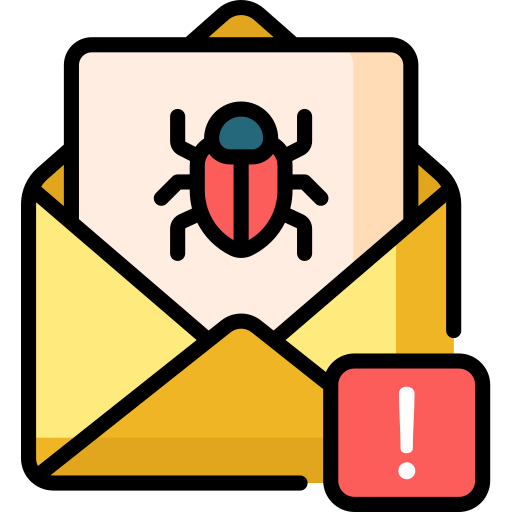

## **Introduction**

Les courriels indésirables (ou "spam") encombrent les boîtes de réception et posent des risques de sécurité. Pour y remédier, nous allons utiliser un modèle de **Support Vector Machine (SVM)** pour classifier les courriels en "ham" (légitimes) et "spam" (indésirables). Nous allons travailler sur un jeu de données textuelles et vectoriser le contenu des messages avant de les soumettre au modèle SVM.

**Étapes à suivre :**

**1. Description du Jeu de Données**

**2. Chargement des bibliothèques**

**3. Chargement et inspection des données**

**4. Prétraitement des données**

**5. Vectorisation des messages**

**6. Entraînement du modèle SVM**

**7. Évaluation du modèle**

## **1. Description du Jeu de Données :**

### 1. Nom du Jeu de Données :
Classification des Courriels (Spam vs Ham)

### 2. Source du Jeu de Données : Kaggle

### 3. Contexte :
Ce jeu de données contient des messages textuels (SMS) qui sont classés en deux catégories : "ham" (non indésirable) et "spam" (indésirable). L'objectif est de construire un modèle qui peut classifier ces messages en fonction de leur contenu.

### 4. Description des Variables :
Category (Label) :
* ham : Messages non indésirables
* spam : Messages indésirables

Message (Text) : Contenu textuel du message (string)

### 5. Distribution des Classes :
* Ham : 87%
* Spam : 13%
* Autres : 0%
* Total : 5158 messages

### 6. Format des Données : CSV

## **2. Chargement des bibliothèques**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## **3. Chargement et inspection des données**

In [4]:
# Charger le jeu de données
df = pd.read_csv('email.csv')

# Afficher les premières lignes du jeu de données
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Informations générales sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Vérifier les valeurs manquantes
df.isnull().sum()

Category    0
Message     0
dtype: int64

## **4. Prétraitement des données**

* Séparer les caractéristiques (Message) et les étiquettes (Category).
* Diviser les données en ensembles d'entraînement et de test.

In [7]:
# Séparer les caractéristiques et les étiquettes
X = df['Message']
y = df['Category']

# Diviser les données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5. Vectorisation des messages**

Utilisation de CountVectorizer pour convertir le texte en une représentation numérique.

In [8]:
# Vectoriser les messages
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## **6. Entraînement du modèle SVM**

Créez un modèle SVM et entraînez-le sur les données vectorisées.

In [9]:
# Créer un modèle SVM avec un noyau linéaire
model = SVC(kernel='linear')

# Entraîner le modèle
model.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

## **7. Évaluation du modèle**

Utilisez les données de test pour évaluer les performances du modèle.

In [10]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_vectorized)

# Évaluer les performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       958
        spam       0.99      0.90      0.94       157

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



### **Matrice de Confusion**

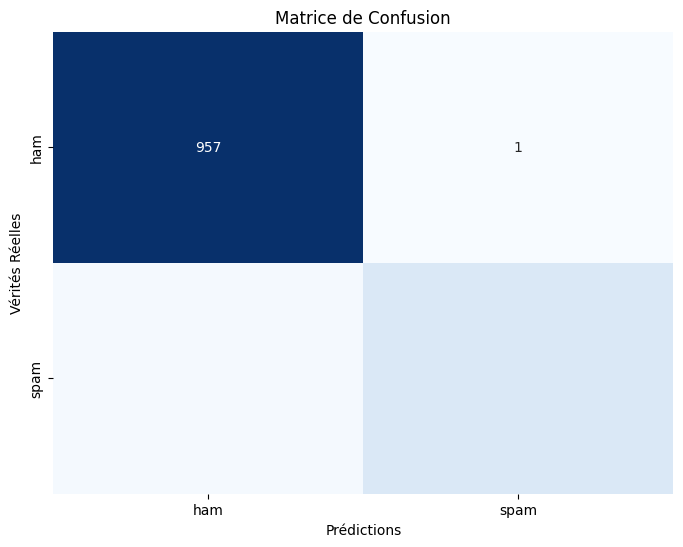

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités Réelles')
plt.show()

## **8. Enregistrer le Modèle SVM**

In [12]:
import joblib

# Enregistrer le modèle
joblib.dump(model, 'svm_spam.joblib')

['svm_spam.joblib']

In [13]:
import os

print("Répertoire de travail actuel :", os.getcwd())

Répertoire de travail actuel : C:\Users\HP\Documents\svm


# **9. Créer une Interface Web avec Gradio**

Créer une interface Web à l'aide de Gradio pour tester notre modèle

In [14]:
!pip install gradio

In [15]:
import gradio as gr

# Fonction pour prédire si le message est spam ou ham
def predict_spam(message):
    # Vectoriser le message
    message_vectorized = vectorizer.transform([message])
    # Prédire avec le modèle SVM
    prediction = model.predict(message_vectorized)
    return prediction[0]

# Créer l'interface Gradio
interface = gr.Interface(
    fn=predict_spam, 
    inputs=gr.Textbox(lines=2, placeholder="Entrez votre message ici..."),  # Modifié ici
    outputs="text",
    title="Classification des Courriels Indésirables",
    description="Entrez un message pour vérifier s'il s'agit d'un spam ou d'un ham."
)

# Lancer l'interface
interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
